In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
from keras import Model
from matplotlib import pyplot as plt

In [33]:
df = pd.read_csv("../data/diabetes.csv")

In [34]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


<Axes: >

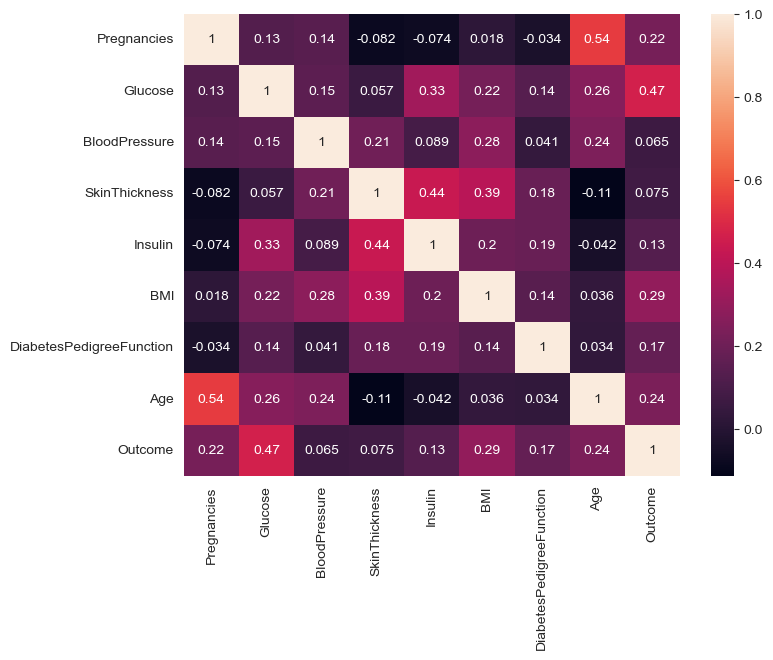

In [38]:
f, ax = plt.subplots(1, figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, ax=ax)

<Axes: xlabel='Outcome', ylabel='count'>

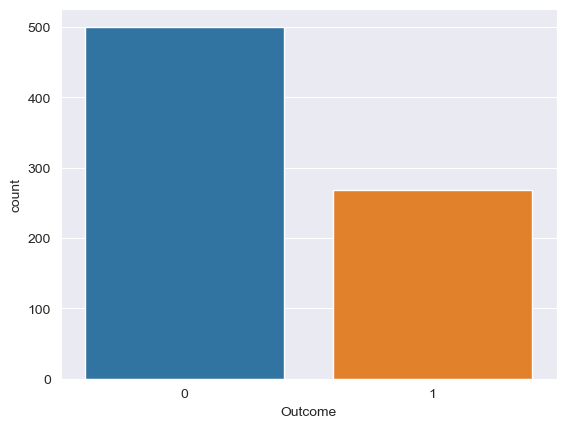

In [39]:
sns.countplot(x=df.Outcome)

In [40]:
column_names = df.columns
column_names = column_names.drop("Outcome")
for name in column_names:
    print("{}\n".format(name))
    print(df.groupby(["Outcome"])[name].mean())
    print("*" * 50)
    print()

Pregnancies

Outcome
0    3.298000
1    4.865672
Name: Pregnancies, dtype: float64
**************************************************

Glucose

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64
**************************************************

BloodPressure

Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64
**************************************************

SkinThickness

Outcome
0    19.664000
1    22.164179
Name: SkinThickness, dtype: float64
**************************************************

Insulin

Outcome
0     68.792000
1    100.335821
Name: Insulin, dtype: float64
**************************************************

BMI

Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64
**************************************************

DiabetesPedigreeFunction

Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64
**************************************************

Age

Outcome
0    31.190000
1    37.067

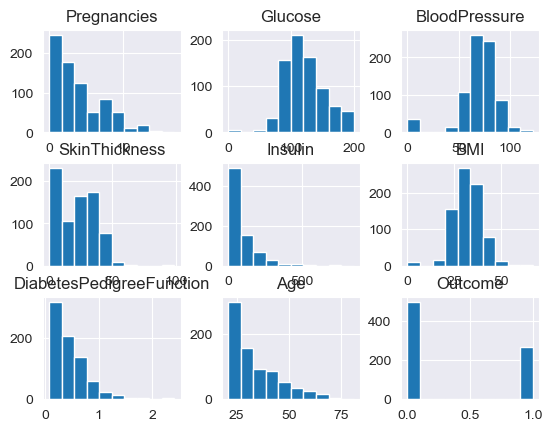

In [41]:
df.hist()
plt.show()

# Multilayer perceptron

In [42]:
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

In [43]:
from sklearn.model_selection import train_test_split

# np.random.seed(5)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

In [44]:
from keras.activations import hard_sigmoid  # noqa
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD  # noqa

# model.add(Dense(10, input_dim=8, activation='relu'))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(10, activation='relu'))
# model.add(Dense(5, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))


def create_model():
    model = Sequential()
    model.add(Dense(10, kernel_initializer="uniform", input_dim=8, activation="relu"))
    model.add(Dense(50, kernel_initializer="uniform", activation="relu"))
    model.add(Dense(10, kernel_initializer="uniform", activation="relu"))
    model.add(Dense(5, kernel_initializer="uniform", activation="relu"))
    model.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))
    sgd = SGD(learning_rate=1 / len(df), momentum=0.9, decay=0.0, nesterov=False)
    model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])
    return model

In [45]:
model_1 = create_model()

In [46]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                90        
                                                                 
 dense_6 (Dense)             (None, 50)                550       
                                                                 
 dense_7 (Dense)             (None, 10)                510       
                                                                 
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,211
Trainable params: 1,211
Non-trainable params: 0
_________________________________________________________________


# Training

In [47]:
def evaluate_model(model: Model):
    m = model
    scores = m.evaluate(X, y)
    print("\n%s: %.2f%%" % (model_1.metrics_names[1], scores[1] * 100))


def evaluate_model_train_test(model: Model):
    scores = model.evaluate(X_train, y_train, verbose=False)
    print("Training Accuracy: %.2f%%" % (scores[1] * 100))
    scores = model.evaluate(X_test, y_test, verbose=False)
    print("Testing Accuracy: %.2f%%" % (scores[1] * 100))

In [48]:
run_hist_1a = model_1.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=10
)

Epoch 1/200
62/62 [==============================] - 1s 5ms/step - loss: 0.6870 - accuracy: 0.6482 - val_loss: 0.6800 - val_accuracy: 0.6429
Epoch 2/200
62/62 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.6531 - val_loss: 0.6702 - val_accuracy: 0.6429
Epoch 3/200
62/62 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.6531 - val_loss: 0.6636 - val_accuracy: 0.6429
Epoch 4/200
62/62 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.6531 - val_loss: 0.6591 - val_accuracy: 0.6429
Epoch 5/200
62/62 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.6531 - val_loss: 0.6561 - val_accuracy: 0.6429
Epoch 6/200
62/62 [==============================] - 0s 2ms/step - loss: 0.6512 - accuracy: 0.6531 - val_loss: 0.6544 - val_accuracy: 0.6429
Epoch 7/200
62/62 [==============================] - 0s 2ms/step - loss: 0.6494 - accuracy: 0.6531 - val_loss: 0.6534 - val_accuracy: 0.6429
Epoch 8/200
6

In [49]:
evaluate_model(model_1)
evaluate_model_train_test(model_1)

24/24 [==============================] - 0s 1ms/step - loss: 0.6468 - accuracy: 0.6510

accuracy: 65.10%
Training Accuracy: 65.31%
Testing Accuracy: 64.29%


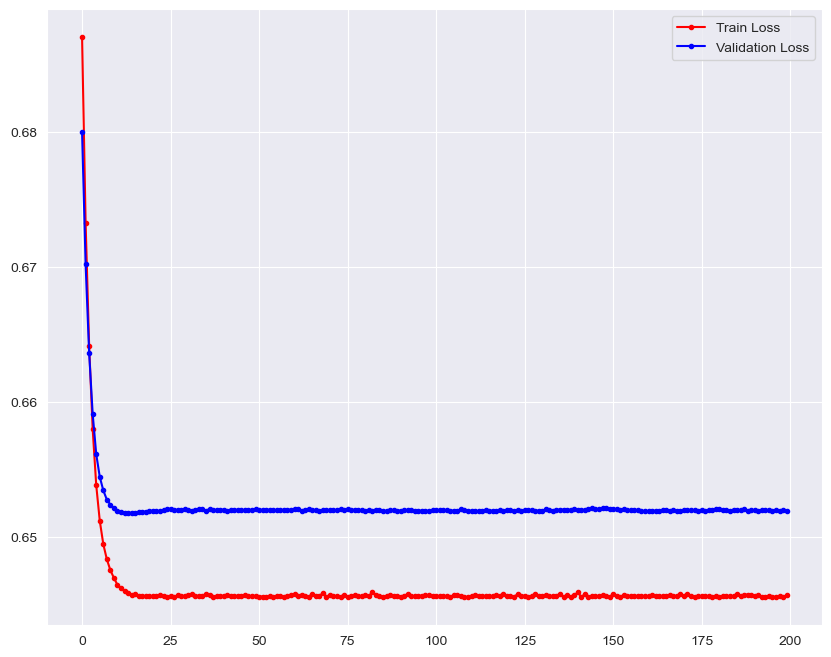

In [50]:
fig_run_hist_1a, ax = plt.subplots(figsize=(10, 8))
ax.plot(run_hist_1a.history["loss"], "r", marker=".", label="Train Loss")
ax.plot(run_hist_1a.history["val_loss"], "b", marker=".", label="Validation Loss")
ax.legend()

In [51]:
from keras.api import keras
from datetime import datetime

logdir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [52]:
run_hist_1b = model_1.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=1000,
    batch_size=100,
    callbacks=[tensorboard_callback],
)

Epoch 1/1000
7/7 [==============================] - 0s 16ms/step - loss: 0.6455 - accuracy: 0.6531 - val_loss: 0.6519 - val_accuracy: 0.6429
Epoch 2/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.6455 - accuracy: 0.6531 - val_loss: 0.6519 - val_accuracy: 0.6429
Epoch 3/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.6455 - accuracy: 0.6531 - val_loss: 0.6519 - val_accuracy: 0.6429
Epoch 4/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.6455 - accuracy: 0.6531 - val_loss: 0.6519 - val_accuracy: 0.6429
Epoch 5/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.6455 - accuracy: 0.6531 - val_loss: 0.6519 - val_accuracy: 0.6429
Epoch 6/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.6455 - accuracy: 0.6531 - val_loss: 0.6519 - val_accuracy: 0.6429
Epoch 7/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.6455 - accuracy: 0.6531 - val_loss: 0.6519 - val_accuracy: 0.6429
Epoch 8/1000
7/7 [=

In [53]:
evaluate_model(model_1)
evaluate_model_train_test(model_1)

24/24 [==============================] - 0s 1ms/step - loss: 0.5434 - accuracy: 0.7318

accuracy: 73.18%
Training Accuracy: 72.96%
Testing Accuracy: 74.03%


In [54]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


def msa_plot():
    n_loss = len(run_hist_1a.history["loss"])
    m_loss = len(run_hist_1b.history["loss"])
    fig_msa = make_subplots(rows=1, cols=1)
    run_hist_1a_traces_msa = [
        go.Scatter(
            x=np.arange(n_loss), y=run_hist_1a.history["loss"], name="loss - Run 1"
        ),
        go.Scatter(
            x=np.arange(n_loss),
            y=run_hist_1a.history["val_loss"],
            name="val_loss - Run 1",
        ),
    ]
    run_hist_1b_traces_msa = [
        go.Scatter(
            x=np.arange(n_loss, n_loss + m_loss),
            y=run_hist_1b.history["loss"],
            name="loss - Run 2",
        ),
        go.Scatter(
            x=np.arange(n_loss, n_loss + m_loss),
            y=run_hist_1b.history["val_loss"],
            name="val_loss - Run 2",
        ),
    ]
    fig_msa.add_traces([*run_hist_1a_traces_msa, *run_hist_1b_traces_msa])
    fig_msa.show()


def mse_plot():
    n_mse = len(run_hist_1a.history["mean_squared_error"])
    m_mse = len(run_hist_1b.history["mean_squared_error"])
    fig_mse = make_subplots(rows=2, cols=1)
    run_hist_1a_traces_mse = [
        go.Scatter(
            x=np.arange(n_mse),
            y=run_hist_1a.history["mean_squared_error"],
            name="mean_squared_error - Run 1",
        ),
        go.Scatter(
            x=np.arange(n_mse),
            y=run_hist_1a.history["val_mean_squared_error"],
            name="val_mean_squared_error - Run 1",
        ),
    ]
    run_hist_1b_traces_mse = [
        go.Scatter(
            x=np.arange(n_mse, n_mse + m_mse),
            y=run_hist_1b.history["mean_squared_error"],
            name="mean_squared_error - Run 2",
        ),
        go.Scatter(
            x=np.arange(n_mse, n_mse + m_mse),
            y=run_hist_1b.history["val_mean_squared_error"],
            name="val_mean_squared_error - Run 2",
        ),
    ]
    fig_mse.add_traces(run_hist_1a_traces_mse, rows=[1, 2], cols=[1, 1])
    fig_mse.add_traces(run_hist_1b_traces_mse, rows=[1, 2], cols=[1, 1])
    fig_mse.show()

In [55]:
msa_plot()

![](../assets/image-35.jpg)


5/5 [==============================] - 0s 1ms/step


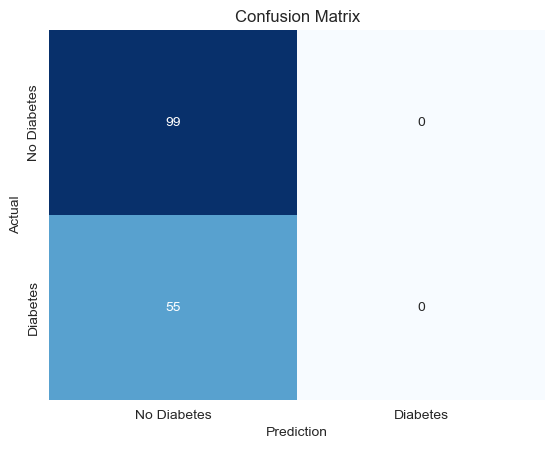

<Figure size 640x480 with 0 Axes>

In [56]:
from tensorflow.python.ops.confusion_matrix import confusion_matrix

y_test_pred = model_1.predict(X_test)

c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(
    c_matrix,
    annot=True,
    xticklabels=["No Diabetes", "Diabetes"],
    yticklabels=["No Diabetes", "Diabetes"],
    cbar=False,
    cmap="Blues",
    fmt=".6g",
)
plt.title("Confusion Matrix")
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()

5/5 [==============================] - 0s 4ms/step


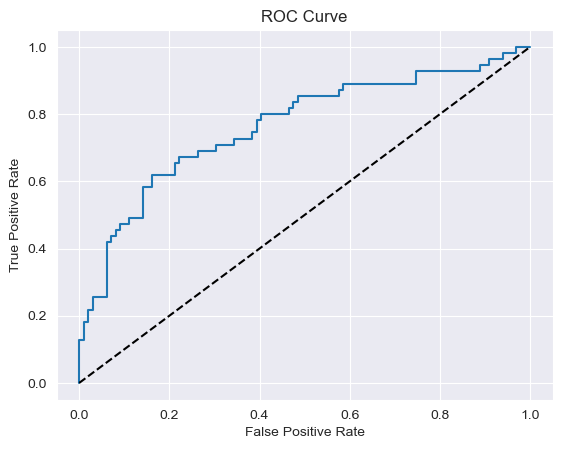

<Figure size 640x480 with 0 Axes>

In [57]:
from sklearn.metrics import roc_curve

# Results - ROC Curve
y_test_pred_probs = model_1.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0, 1], [0, 1], "--", color="black")  # diagonal line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
plt.clf()

In [58]:
def predict_use_case(model: Model, **kwargs):
    def predict(col, data):
        data = data.reshape(1, -1)
        final_prediction = model.predict(data)
        print(f"col: {col}, final_prediction: ", final_prediction)

    if not kwargs:
        print("Please Enter the Folowing Metrics one at a time")
        a = int(input("Enter Metric Pregnancies: "))
        b = int(input("Enter Metric Glucose: "))
        c = int(input("Enter Metric BloodPressure: "))
        d = int(input("Enter Metric SkinThickness: "))
        e = int(input("Enter Metric Insulin: "))
        f = float(input("Enter Metric BMI: "))
        g = float(input("Enter Metric DiabetesPedigreeFunction: "))
        h = int(input("Enter Metric Age: "))
        data = np.array([a, b, c, d, e, f, g, h])
    else:
        for k, v in kwargs.items():
            predict(k, np.array(v))

In [59]:
model_1.save("../models/diabetes_risk_nn.h5")

In [60]:
from keras.saving.save import load_model

model = load_model("../models/diabetes_risk_nn.h5")
outcome_1 = [6, 148, 72, 35, 0, 33.6, 0.627, 50]
outcome_0 = [1, 85, 66, 29, 0, 26.6, 0.351, 31]

predict_use_case(model, outcome_1=outcome_1, outcome_0=outcome_0)

1/1 [==============================] - 0s 60ms/step
col: outcome_1, final_prediction:  [[0.55123097]]
1/1 [==============================] - 0s 20ms/step
col: outcome_0, final_prediction:  [[0.20901828]]
